## Нейронные сети в прогнозировании временных рядов


Временные ряды https://github.com/alsu124/DA_NEW/tree/master/Lections/Time_series_lection_1

https://www.youtube.com/watch?v=u433nrxdf5k&t=141s#


https://www.youtube.com/watch?v=oMatzWuAo2g&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=14


In [ ]:
import numpy
import pandas as pd

In [2]:
# Импорт matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
# Импорт обучающей выборки
sales = pd.read_csv(r'C:\Users\Alsu1\Desktop\ИТИС_2020-21\Доп главы\нейронные сети\Lecture_4_02\monthly car sales in Quebec\monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])


In [4]:
#  Знакомимся с данными
sales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [5]:
#  Знакомимся с данными
sales.shape

(108, 2)

In [11]:
#  Знакомимся с данными
sales.tail()

,Month,Monthly car sales in Quebec 1960-1968
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


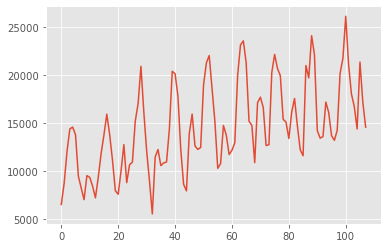

In [12]:
#  График, чтобы ответить на 4 вопроса
sales.iloc[:,1].plot()


In [13]:
# Преобразуем данные
sales_2 = pd.DataFrame()

for i in range(12,0,-1):
    sales_2['t-'+str(i)] = sales.iloc[:,1].shift(i)

sales_2['t'] = sales.iloc[:,1].values

print(sales_2.head(23))




       t-12     t-11     t-10      t-9      t-8      t-7      t-6      t-5  \
0       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5       NaN      NaN      NaN      NaN      NaN      NaN      NaN   6550.0   
6       NaN      NaN      NaN      NaN      NaN      NaN   6550.0   8728.0   
7       NaN      NaN      NaN      NaN      NaN   6550.0   8728.0  12026.0   
8       NaN      NaN      NaN      NaN   6550.0   8728.0  12026.0  14395.0   
9       NaN      NaN      NaN   6550.0   8728.0  12026.0  14395.0  14587.0   
10      NaN      NaN   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0   
11      NaN   6550.0   8728.0  12026.0  14395.0  14587.0  13791.

In [14]:
#  Отрезаем первые 12 строк
sales_4 = sales_2[12:]

sales_4.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
12,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237
13,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374
14,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837
15,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926


In [15]:
#  предикторы и отклик разделяем
# Отклик - группирующая переменная -  вектор y
y = sales_4['t']
# Предикторы - таблица X
X = sales_4.drop('t', axis=1)

In [21]:
#  Разделяем на обучающую и тестовую выборки
#  Тестовая - последние наблюдения
X_train = X[:91]
y_train = y[:91]
X_test  = X[91:]
y_test  = y[91:]

In [22]:
#  Все хорошо?
print(sales_4.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(96, 13)
(91, 12)
(91,)
(5, 12)
(5,)


In [23]:
#  Все хорошо?
print(X_train.head(5))

       t-12     t-11     t-10      t-9      t-8      t-7     t-6     t-5  \
12   6550.0   8728.0  12026.0  14395.0  14587.0  13791.0  9498.0  8251.0   
13   8728.0  12026.0  14395.0  14587.0  13791.0   9498.0  8251.0  7049.0   
14  12026.0  14395.0  14587.0  13791.0   9498.0   8251.0  7049.0  9545.0   
15  14395.0  14587.0  13791.0   9498.0   8251.0   7049.0  9545.0  9364.0   
16  14587.0  13791.0   9498.0   8251.0   7049.0   9545.0  9364.0  8456.0   

       t-4     t-3      t-2      t-1  
12  7049.0  9545.0   9364.0   8456.0  
13  9545.0  9364.0   8456.0   7237.0  
14  9364.0  8456.0   7237.0   9374.0  
15  8456.0  7237.0   9374.0  11837.0  
16  7237.0  9374.0  11837.0  13784.0  


In [24]:
#  Преобразование pandas dataframe в numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [26]:
from keras.models import Sequential
from keras.layers import Dense


In [27]:
#  Обучение нейронной сети 

# Creating a model
model = Sequential()
# внутренний слой с 8 нейронами, 12 столбцов 
model.add(Dense(8, input_dim=12, activation='relu'))
# выходной слой с линейной комбинацией. Почему не логистическая ?
model.add(Dense(1, activation='linear'))


# Compiling model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])


# Training a model
model.fit(X_train, y_train, epochs=300, batch_size=None)



Epoch 1/300
3/3 [==============================] - 0s 1ms/step - loss: 301175008.0000 - mean_absolute_percentage_error: 111.7713
Epoch 2/300
3/3 [==============================] - 0s 999us/step - loss: 291038368.0000 - mean_absolute_percentage_error: 109.7617
Epoch 3/300
3/3 [==============================] - 0s 1ms/step - loss: 281127520.0000 - mean_absolute_percentage_error: 107.7255
Epoch 4/300
3/3 [==============================] - 0s 2ms/step - loss: 271063008.0000 - mean_absolute_percentage_error: 105.6369
Epoch 5/300
3/3 [==============================] - 0s 2ms/step - loss: 261029760.0000 - mean_absolute_percentage_error: 103.5850
Epoch 6/300
3/3 [==============================] - 0s 2ms/step - loss: 250905744.0000 - mean_absolute_percentage_error: 101.4820
Epoch 7/300
3/3 [==============================] - 0s 2ms/step - loss: 241297968.0000 - mean_absolute_percentage_error: 99.2778
Epoch 8/300
3/3 [==============================] - 0s 668us/step - loss: 231234368.0000 - mean_a

In [28]:
# оценка качества модели на тестовом множестве
# что здесь не так?
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

1/1 [==============================] - 0s 3ms/step - loss: 6831529.0000 - mean_absolute_percentage_error: 11.2281

MAPE: 11.23%


In [29]:
# Вычисляем прогноз
predictions = model.predict(X_test)


In [30]:
# Вычисляем подгонку
predictions_train = model.predict(X_train)

In [32]:
# Вспоминаем размеры таблиц
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(91, 12)
(91,)
(5, 12)
(5,)


In [ ]:
#   было 108 наблюдений

#   отбросили 12 стало 96
#   train 91
#   test  5


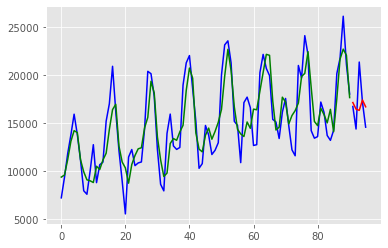

In [33]:
#   График с результатами

#   numpy.arange([start, ]stop, [step, ]dtype=None)¶

x2 = numpy.arange(0, 91, 1)

x3 = numpy.arange(91, 96, 1)


plt.plot(x2, y_train, color='blue')

plt.plot(x2, predictions_train, color='green')

plt.plot(x3, y_test, color='blue')

plt.plot(x3, predictions, color='red')



In [ ]:
Попробовать улучшить модель.